In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [322]:
df = pd.read_excel("/Users/canderson/sars_somerville/ratio.xlsx")
df = df[df.Date >= "2020-09-28"]
df["Date2"] = df.Date.dt.strftime('%Y-%m-%d')
df["Date2"] = df.Date2.str.split("2020-").str[1]



print(df.shape)
df.head()


(78, 4)


,Site,Date,Ratio,Date2
6,A-743,2020-09-28,0.00000,09-28
7,A-743,2020-10-02,0.00303,10-02
8,A-743,2020-10-05,0.00000,10-05
9,A-743,2020-10-07,0.00000,10-07
10,A-743,2020-10-14,0.00000,10-14


In [323]:
df.dtypes

Site             object
Date     datetime64[ns]
Ratio           float64
Date2            object
dtype: object

In [324]:
s1 = df[df.Site == "C1-2121"]
s2 = df[df.Site == "C2-1050"]

s3 = df[df.Site == "S2-1927"]
s3 = s3[s3.Date != "2020-10-23"]

s4 = df[df.Site == "A-743"]
s5 = df[df.Site == "C2-367"]

print(s1.shape)
print(s2.shape)
print(s3.shape)
print(s4.shape)
print(s5.shape)


s3.head()

(15, 4)
(15, 4)
(15, 4)
(15, 4)
(15, 4)


,Site,Date,Ratio,Date2
90,S2-1927,2020-09-28,0.00270,09-28
91,S2-1927,2020-10-02,0.00496,10-02
92,S2-1927,2020-10-05,0.00515,10-05
93,S2-1927,2020-10-07,0.00710,10-07
94,S2-1927,2020-10-14,0.00269,10-14


In [325]:

s1_date_ratio = s1[["Date", "Ratio"]]
s1_date_ratio = s1_date_ratio.set_index(s1_date_ratio.Date)
s1_date_ratio = s1_date_ratio.rolling("7d").mean().reset_index()
s1_date_ratio = s1_date_ratio.rename(columns = {"Ratio": "Rolling"})

s2_date_ratio = s2[["Date", "Ratio"]]
s2_date_ratio = s2_date_ratio.set_index(s2_date_ratio.Date)
s2_date_ratio = s2_date_ratio.rolling("7d").mean().reset_index()
s2_date_ratio = s2_date_ratio.rename(columns = {"Ratio": "Rolling"})

s3_date_ratio = s3[["Date", "Ratio"]]
s3_date_ratio = s3_date_ratio.set_index(s3_date_ratio.Date)
s3_date_ratio = s3_date_ratio.rolling("7d").mean().reset_index()
s3_date_ratio = s3_date_ratio.rename(columns = {"Ratio": "Rolling"})

s4_date_ratio = s4[["Date", "Ratio"]]
s4_date_ratio = s4_date_ratio.set_index(s4_date_ratio.Date)
s4_date_ratio = s4_date_ratio.rolling("7d").mean().reset_index()
s4_date_ratio = s4_date_ratio.rename(columns = {"Ratio": "Rolling"})

s5_date_ratio = s5[["Date", "Ratio"]]
s5_date_ratio = s5_date_ratio.set_index(s5_date_ratio.Date)
s5_date_ratio = s5_date_ratio.rolling("7d").mean().reset_index()
s5_date_ratio = s5_date_ratio.rename(columns = {"Ratio": "Rolling"})


In [326]:
s1 = s1.merge(s1_date_ratio, how="left", on = "Date")
s2 = s2.merge(s2_date_ratio, how="left", on = "Date")
s3 = s3.merge(s3_date_ratio, how="left", on = "Date")
s4 = s4.merge(s4_date_ratio, how="left", on = "Date")
s5 = s5.merge(s5_date_ratio, how="left", on = "Date")


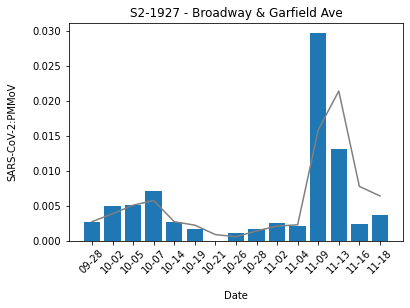

In [332]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

x_pos = [i for i, _ in enumerate(s3.Date2)]

ax.bar(x_pos, s3.Ratio)
ax.plot(s3.Rolling, color = "grey", linewidth = 1.5)


plt.xlabel("\nDate")
plt.ylabel("SARS-CoV-2:PMMoV\n")
plt.title("S2-1927 - Broadway & Garfield Ave")
plt.xticks(x_pos, s3.Date2, rotation=45)

plt.show()

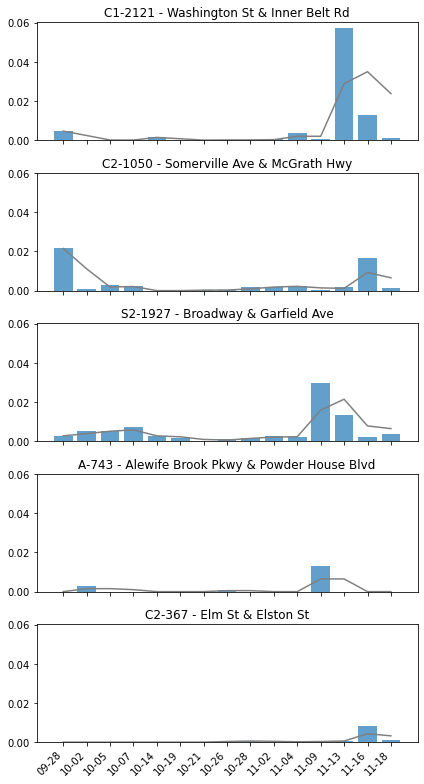

In [327]:
fig, axs = plt.subplots(5, sharex=True, sharey=True, clear=True, figsize=(6,11))


x_pos = [i for i, _ in enumerate(s1.Date2)]
axs[0].bar(x_pos, s1.Ratio, alpha = 0.7)
axs[0].plot(s1.Rolling, color = "grey", linewidth = 1.5)
axs[0].title.set_text("C1-2121 - Washington St & Inner Belt Rd")

x_pos = [i for i, _ in enumerate(s2.Date2)]
axs[1].bar(x_pos, s2.Ratio, alpha = 0.7)
axs[1].plot(s2.Rolling, color = "grey", linewidth = 1.5)
axs[1].title.set_text("C2-1050 - Somerville Ave & McGrath Hwy")

x_pos = [i for i, _ in enumerate(s3.Date2)]
axs[2].bar(x_pos, s3.Ratio, alpha = 0.7)
axs[2].plot(s3.Rolling, color = "grey", linewidth = 1.5)
axs[2].title.set_text("S2-1927 - Broadway & Garfield Ave")

x_pos = [i for i, _ in enumerate(s4.Date2)]
axs[3].bar(x_pos, s4.Ratio, alpha = 0.7)
axs[3].plot(s4.Rolling, color = "grey", linewidth = 1.5)
axs[3].title.set_text("A-743 - Alewife Brook Pkwy & Powder House Blvd")

x_pos = [i for i, _ in enumerate(s5.Date2)]
axs[4].bar(x_pos, s5.Ratio, alpha = 0.7)
axs[4].plot(s5.Rolling, color = "grey", linewidth = 1.5)
axs[4].title.set_text("C2-367 - Elm St & Elston St")

plt.xticks(x_pos, s5.Date2, rotation = 45, ha = "right")
#plt.set_xticklabels(s1.Date2, rotation=90, ha = "center")



plt.tight_layout()
plt.show();

In [328]:
fig.savefig("/Users/canderson/sars_somerville/rolling_avgs.pdf", bbox_inches='tight', dpi=600)